# Поканальные спектры

In [1]:
!date
!pwd

Сб янв 12 15:26:44 MSK 2019
/home/alena/SPHERE/Data2018/Data/2018_12_07-08_run2/spectrum


In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime as dt

In [2]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

In [3]:
def read_data_file(filename):
    try:
        frame = pd.read_csv(filename, header = None, index_col=0, sep='\s+', 
                            skiprows = 45, nrows = 800)

        off = [38, 39, 42, 43, 46, 47, 50, 51, 54, 55, 58, 59, 62, 63, 64]
        frame = frame.drop(columns = [x for x in off])
        frame = frame.drop(columns = [x for x in range(65,113)])
        return frame

    except Exception as e:
        errormsg = e.args[0]
        #errortype = errormsg.split('.')[0].strip()
        print(errormsg)
        return 'NULL'

In [4]:
''' чтение пьедесталов и коэффициентов для учета напряжения для событий '''

pied = pd.read_csv('piedestal01.csv', index_col=0)
print(len(pied))
pied.tail()

2122


,EID,I_coef,p0_1,p1_1,p0_2,p1_2,p0_3,p1_3,p0_4,p1_4,...,p0_53,p1_53,p0_56,p1_56,p0_57,p1_57,p0_60,p1_60,p0_61,p1_61
2117,28499,1.000000,50.0,48.0,49.0,47.0,49.0,50.0,50.0,46.0,...,49.0,54.0,51.0,60.0,49.0,48.0,48.0,53.0,50.5,56.0
2118,28501,1.000000,50.0,49.0,49.0,47.0,48.5,49.0,49.5,47.0,...,50.0,55.0,51.5,59.0,49.0,48.0,47.0,53.0,50.0,56.0
2119,28783,0.971455,50.0,48.0,50.0,48.0,49.0,50.0,49.0,46.0,...,49.0,54.0,51.0,60.0,48.0,47.0,47.0,52.0,49.0,56.0
2120,28785,0.971455,50.0,48.0,50.0,47.5,49.0,50.0,49.0,46.0,...,49.0,54.0,51.5,59.0,49.5,48.0,48.0,52.5,50.0,57.0
2121,28787,0.971455,51.0,48.0,49.0,47.5,49.0,48.0,50.0,46.5,...,49.0,55.0,51.0,60.0,49.5,48.0,47.0,52.0,51.0,57.0


In [5]:
plt.close("all")

In [6]:
framecol = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 
            40, 41, 44, 45, 48, 49, 52, 53, 56, 57, 60, 61]

In [10]:
%%time
''' проверка пьедесталов  '''

dirname = '../data.txt/'
for i in range(pied.shape[0]):
    if i%5 == 1:
        print(i, end=' ')
        
    ## read data frame
    filename = dirname + str(pied.EID[i]) + '.txt'
    frame = read_data_file(filename) 
    
    # ''' new column with parity '''
    for j in frame.index:
        frame.loc[j,'par'] = int(j%2) 

    #for chan in [1,22]:
    for chan in frame.columns[:-1]:
    
        ## ''' minus piedestal '''
        p0 = pied.loc[i, 'p0_'+str(chan)]
        p1 = pied.loc[i, 'p1_'+str(chan)]
        if(p0 == 0 or p1 == 0):
            print('p0 == 0 or p1 == 0:', p0, p1)
            break

print('Ok')

1 6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176 181 186 191 196 201 206 211 216 221 226 231 236 241 246 251 256 261 266 271 276 281 286 291 296 301 306 311 316 321 326 331 336 341 346 351 356 361 366 371 376 381 386 391 396 401 406 411 416 421 426 431 436 441 446 451 456 461 466 471 476 481 486 491 496 501 506 511 516 521 526 531 536 541 546 551 556 561 566 571 576 581 586 591 596 601 606 611 616 621 626 631 636 641 646 651 656 661 666 671 676 681 686 691 696 701 706 711 716 721 726 731 736 741 746 751 756 761 766 771 776 781 786 791 796 801 806 811 816 821 826 831 836 841 846 851 856 861 866 871 876 881 886 891 896 901 906 911 916 921 926 931 936 941 946 951 956 961 966 971 976 981 986 991 996 1001 1006 1011 1016 1021 1026 1031 1036 1041 1046 1051 1056 1061 1066 1071 1076 1081 1086 1091 1096 1101 1106 1111 1116 1121 1126 1131 1136 1141 1146 1151 1156 1161 1166 1171 1176 1181 1186 1191 1196 1201 1206 1211 1216 12

In [ ]:
%%time
''' построение спектра '''

startevent = 40
stopevent = startevent + 10

dirname = '../data.txt/'
startx,stopx = 450,600
binnum = 1000    ## bin number in hist

ss = [[0] * len(framecol)]* binnum
diff = pd.DataFrame(ss, columns=framecol)

for i in range(startevent,stopevent): #pied.shape[0]):
    #if i%5 == 1:
    print(i, end=' ')
        
    ## read data frame
    filename = dirname + str(pied.EID[i]) + '.txt'
    frame = read_data_file(filename) 
    
    # ''' new column with parity '''
    for j in frame.index:
        frame.loc[j,'par'] = int(j%2) 

    #for chan in [1,22]:
    for chan in frame.columns[:-1]:
    
        ## ''' minus piedestal '''
        p0 = pied.loc[i, 'p0_'+str(chan)]
        p1 = pied.loc[i, 'p1_'+str(chan)]
            
        datum = (frame[chan] - (1 - frame.par) * p0 - frame.par * p1)[startx:stopx]
        hists = plt.hist(datum, bins=np.arange(0, binnum+1, 1))
    
        diff[chan] = diff[chan] + hists[0]
        plt.close()

## make integral spectrum      
integral = pd.DataFrame([[0] * len(frame.columns[:-1])]* binnum)
for chan in frame.columns[:-1]:
    integral[chan] = diff[chan].sum() - diff[chan].cumsum()   

## save spectrums to file
filename='integral' + str(startevent) + '-' + str(stopevent) + '.csv'
integral.to_csv(filename)
filename='diff' + str(startevent) + '-' + str(stopevent) + '.csv'
diff.to_csv(filename)

40 41 42 

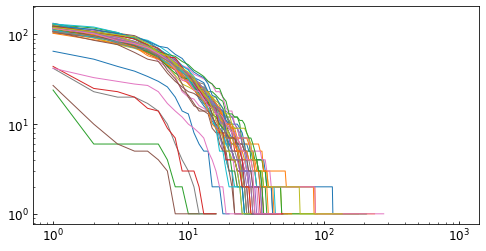

In [214]:
''' Интегральный спектр '''

for chan in frame.columns[:-1]:
    plt.plot(integral[chan])
plt.xscale('log')
plt.yscale('log')

In [205]:
#integral.to_csv('integral.csv')
#diff.to_csv('diff.csv')

### END